by Michael Holt for the Dataphilly 2022 Datathon to help ElderNet.

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns

# A Summary of Services Provided Per Time of Day
Hours will be in military time so 14:00 = 2pm.

## Getting Established
### (See below for conclusions)

In [49]:
care_df.head()

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
care_df.assistance_category.value_counts()

Remote Contact with client (phone, email)    8736
Remote Contact w/o client                    1948
Home Visit                                    766
Community                                     757
Internal Discussions                          233
ElderNet Office                                47
Name: assistance_category, dtype: int64

In [51]:
care_df.loc[:, "assistance_date"] = pd.to_datetime(care_df.assistance_date)
care_df.loc[:, "assistance_date"]

0       2019-01-01 12:50:00
1       2019-01-02 07:30:00
2       2019-01-02 09:50:00
3       2019-01-02 10:10:00
4       2019-01-02 10:15:00
                ...        
12482   2021-09-13 11:40:00
12483   2021-09-15 09:35:00
12484   2021-09-15 10:55:00
12485   2021-09-15 14:05:00
12486   2021-09-15 18:05:00
Name: assistance_date, Length: 12487, dtype: datetime64[ns]

In [52]:
care_df.loc[:, "assistance_date"] = care_df.loc[:, "assistance_date"].dt.hour
care_df.loc[:, "assistance_date"]

0        12
1         7
2         9
3        10
4        10
         ..
12482    11
12483     9
12484    10
12485    14
12486    18
Name: assistance_date, Length: 12487, dtype: int64

In [53]:
care_df.head()

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,12,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,7,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,9,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,10,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,10,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
hours_assistance_cross = pd.crosstab(care_df.assistance_category, care_df.assistance_date, normalize = 'all')
hours_assistance_cross

assistance_date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
assistance_category,,,,,,,,,,,,,,,,,,,,,
Community,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000240,0.001121,...,0.011772,0.008489,0.002002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000160
ElderNet Office,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000320,...,0.000721,0.000320,0.000480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Home Visit,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.003363,...,0.009850,0.009129,0.008729,0.000240,0.000000,0.000000,0.000000,0.000080,0.000000,0.000000
Internal Discussions,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000400,0.001201,...,0.001682,0.002883,0.001281,0.000080,0.000080,0.000080,0.000000,0.000000,0.000000,0.000000
Remote Contact w/o client,0.00024,0.00024,0.00016,0.00008,0.000000,0.00008,0.00000,0.000320,0.001041,0.017458,...,0.021142,0.018900,0.011692,0.001682,0.000641,0.000160,0.000320,0.000320,0.000240,0.000480
"Remote Contact with client (phone, email)",0.00032,0.00040,0.00048,0.00032,0.000561,0.00000,0.00016,0.001201,0.005045,0.063666,...,0.104829,0.096821,0.051413,0.004725,0.002002,0.001441,0.001441,0.001602,0.001922,0.001922


<AxesSubplot:xlabel='assistance_date', ylabel='assistance_category'>

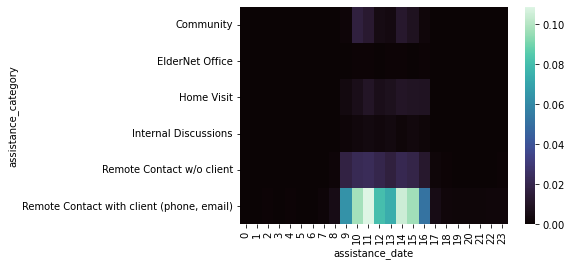

In [55]:
sns.heatmap(hours_assistance_cross, cmap = 'mako')

It appears that most of the assistance given has been remote contact.
It has been during the hours of 9-5pm and 

### Now, that we have something that works, concatenating in the pantry data.

In [56]:
care_and_pantry_df = pd.concat([care_df, pantry_df])
care_and_pantry_df.head()

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,12,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,7,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,9,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,10,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,10,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unlike before, I will be rounding to the nearest hour using dt.round('H') .

In [57]:
care_df = pd.read_csv('data/care_management_anonymized.csv')
pantry_df = pd.read_csv('data/pantry_anonymized.csv')
care_and_pantry_df = pd.concat([care_df, pantry_df])

care_and_pantry_df.loc[:, "assistance_date"] = pd.to_datetime(care_and_pantry_df.assistance_date)
care_and_pantry_df.loc[:, "assistance_date"] = care_and_pantry_df.loc[:, "assistance_date"].dt.round('H').dt.hour
care_and_pantry_df.head()

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,13,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,8,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,10,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,10,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,10,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
care_and_pantry_df.tail()

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
6268,611,14,Food Pantry: Food Pantry Poundage,25.0,Pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6269,516,15,Food Pantry: Food Pantry Poundage,25.0,Pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6270,274,15,Food Pantry: Food Pantry Poundage,25.0,Pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6271,524,15,Food Pantry: Food Pantry Poundage,25.0,Pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6272,191,14,Food Pantry: Food Pantry Poundage,25.0,Pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
care_pantry_hours_assistance_cross = pd.crosstab(care_and_pantry_df.assistance_category,
                                                 care_and_pantry_df.assistance_date)
care_pantry_hours_assistance_cross

assistance_date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
assistance_category,,,,,,,,,,,,,,,,,,,,,
Community,0,0,0,0,0,0,0,0,3,6,...,116,114,64,2,0,0,0,0,0,2
ElderNet Office,0,0,0,0,0,0,0,0,0,2,...,10,5,7,0,0,0,0,0,0,0
Food Pantry: Easter Outreach,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
Food Pantry: Food Pantry Poundage,27,9,0,0,0,0,15,0,41,33,...,973,809,250,46,1,14,0,7,36,0
Food Pantry: Holiday Baskets,24,15,6,0,0,0,0,0,0,5,...,26,56,94,19,0,0,0,0,31,14
Home Visit,0,0,0,0,0,0,0,0,0,22,...,135,111,141,18,0,0,0,1,0,0
Internal Discussions,0,0,0,0,0,0,0,0,2,7,...,30,26,27,6,0,2,0,0,0,0
Remote Contact w/o client,7,2,1,2,1,1,0,3,7,105,...,245,232,235,39,14,4,3,5,3,3
"Remote Contact with client (phone, email)",12,5,7,1,8,2,1,7,31,383,...,1245,1161,1138,120,38,14,20,16,25,25


-----
## Conclusions

### Busiest times of the day for each service:

<AxesSubplot:xlabel='assistance_date', ylabel='assistance_category'>

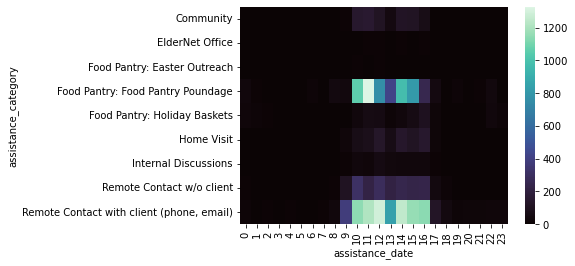

In [60]:
sns.heatmap(care_pantry_hours_assistance_cross, cmap = 'mako')

This chart shows the relative frequency of different services at different times of the day.

Note that the **food pantry** service has different peaks than the **remote contact with client** service.

---

**Food pantry** has the most events at 11am.

**Remote contact with client (phone, email)** has the most events at noon and 2pm.

---

This is a messy comparison, but the data below should be easier to read:

### When did events happen overall?

<AxesSubplot:>

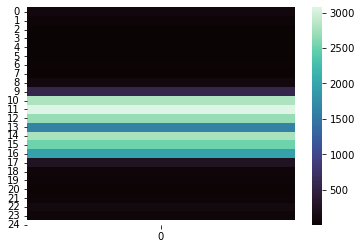

In [61]:
sns.heatmap(care_and_pantry_df.loc[: , 'assistance_date'].value_counts().sort_index().values.reshape(24,1),
            cmap = "mako",
           yticklabels = range(0, 25))

-----

### When did food pantry events happen?

<AxesSubplot:>

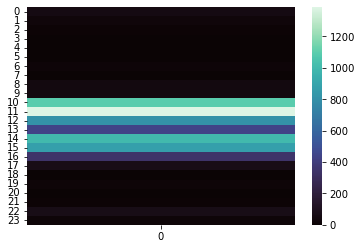

In [75]:
pantry_df = pd.read_csv('data/pantry_anonymized.csv')
pantry_df.loc[:, "assistance_date"] = pd.to_datetime(pantry_df.assistance_date)
pantry_df.loc[:, "assistance_date"] = pantry_df.loc[:, "assistance_date"].dt.round('H').dt.hour
assistance_by_hour = pantry_df.loc[:, "assistance_date"].value_counts()
#  filling in 0's for the hours which had no events recorded
for n in [3,4,5,7,20]:
    assistance_by_hour[n] = 0
assistance_by_hour = assistance_by_hour.sort_index()
sns.heatmap(assistance_by_hour.values.reshape(24,1),
            cmap = "mako",
           yticklabels = range(0, 24))


Food pantry events almost entirely occurred across 10am to 4pm. The most events took place before noon. Within the active hours, the quietest times were generally 1pm and 4pm.

In [73]:
#  pantry_df.loc[:, "assistance_date"].value_counts().sort_index()

-----

### When did care management events happen?

<AxesSubplot:>

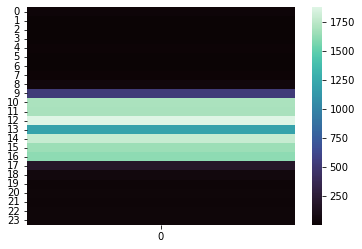

In [70]:
care_df = pd.read_csv('data/care_management_anonymized.csv')
care_df.loc[:, "assistance_date"] = pd.to_datetime(care_df.assistance_date)
care_df.loc[:, "assistance_date"] = care_df.loc[:, "assistance_date"].dt.round('H').dt.hour
sns.heatmap(care_df.loc[: , 'assistance_date'].value_counts().sort_index().values.reshape(24,1),
            cmap = "mako",
           yticklabels = range(0, 24))

Care management events almost entirely occurred across 9pm to 4pm.
The most events took place before or after 1pm.
Within the active hours, the quietest times were generally 9am and 1pm.

In [72]:
#  care_df.loc[: , 'assistance_date'].value_counts().sort_index()